# Analysis of Sequencing data from mapping step

In [2]:
using BioSequences, wgregseq, FASTX, CairoMakie, CSV, DataFrames, CodecZlib

wgregseq.plotting_style.default_makie!()

## Explore library

In [3]:
df_twist = CSV.read("../../../data/twist_orders/2022-02-15_twist_order.csv", DataFrame)
promoter_seqs = [LongDNA{4}(seq[27:196]) for seq in df_twist.sequence]
insertcols!(df_twist, 2, :promoter_seq => [LongDNA{4}(x[27:186]) for x in df_twist.sequence])
sequence_dict = Dict(df_twist.promoter_seq .=> df_twist.name)
first(df_twist, 5)


,genes,promoter_seq
,String,LongSequ…
1,"[""rspA"", ""rspB""]",TTTCATCTTTTGTCAACCATTCACAGCGCAAATATACGCCTTTTTTTGTGATCACTCCGGCTTTTTTCGATCTTTATACTTGTATGGTAGTAGCTCAGTTGCGTAGATTTCATGCATCACGACAAGCGATGCAAGGAATCGAACATGAAGATCGTAAAGG
2,"[""rspA"", ""rspB""]",TCTGATCTTTTGTAAATCATTCACAGTGCAAATTTAAGTCTTTTTTTGTGATCACTCCGGCTATATTCGATCTATTTACTTGTATGGTAGTAGCTCAGTTGCGTAGATTTCATGCGTCACGACAAGCGACGCAGGGAATCGAATATGAAGATCGTAAAGG
3,"[""rspA"", ""rspB""]",TTTCATCTTTTCTCAACCACTCACAGCGTAAACTTACGCCTGTTTGTGTGATCACTACGGCGTTTTTCAATCTTTATACTTGTATGGTAGTCTCTCAGTTGCGTAGATTTGCTGCATCACGACAAGCGATGCATGGAATCGAACATGAAGGTCGTAAAGG
4,"[""rspA"", ""rspB""]",GTTCATCCTTCTTCAACCATTCACAGCGGAAATATACGCCTTTTCTCGAGATCACTCCGGCTTTTTTCGATCTTTATACTTGTATGGTAGTAGCTGAGTTGTGTAGTTTTCATGCATCACAACACGCGATGCAAGGAATGAAACATGAGGATCGTAAAGG
5,"[""rspA"", ""rspB""]",TTTCATCTTTTGTCAACCATTCACCGCGCAAATATACGCCTTCTTTTGTGATCACTCAGGCTCTTTTCGATCTTTCTACTAGTATGGTAATAGCTAATTTGCGTGGATTGCATGCATCACGACAAGCATTGCAAGGAATCGAACACGAAGATCCTTAAGG


In [4]:
sequence_dict

Dict{LongSequence{DNAAlphabet{4}}, String} with 178612 entries:
  CCGGCGATCCGTCGTGACATAGCGGTGGTGGTAGCAG… => "ihfAp4_376"
  CTGTTTTATAATAACTTAATCGCGCATAAAAAAAGGC… => "galEp_664"
  AACAAAATCAAACGTTGAGCATAGTCCTTCCCCTTCC… => "yacCp_1339"
  GGGCGCTGATCGAACGTGGACGTGGTTTGCGTAGCTA… => "yadI_predicted_639"
  GTTCAAATTTACAGACAAATATATTTGCGTCAACACC… => "intE_xisE_ymfH_predicted_825"
  TGTCCTGAGAAGTTTTTGCAGTCCCGGCCTTTCGGAC… => "tfaE_stfE_predicted_518"
  TGGCCTGCCCCCTCATCTTATTTCTGGTACTTAGGAG… => "ygeW_predicted_144"
  TATTCAATGTCCAGTTGCGTATCATTTATATGTTTTT… => "xdhAp2_1117"
  CGGACCGTTTCCAGAGGCTGCACCTCGACGCTTGCAG… => "ssnAp_1394"
  ATCTGGAGAACGATCTTGTATTAAGAAGTACCCGTTC… => "yadL_yadM_yadC_yadK_predicted_1360"
  AAAATTATTCATTTTCATCCCTTTCATTTAATCAGTT… => "uacT_predicted_395"
  GGCTTCTCTATCGAGTGGCCCTTTTTTTGCCTTTCAC… => "gatYp_1314"
  CCGGCGAACCGCCAAGACATCGCAATGGTGGACTTAG… => "ihfAp4_1483"
  AGGACCGTTTCCAGACCCTCCACCTCGGCGCTTACTT… => "ssnAp_808"
  ATTCTGAAGGGGCAAGATCAATTTATGTATACCCTTC… => "sulAp_827"
  C

### Diversity of Read 1

┌ Warning: Could not find font /Users/tomroschinger/.julia/packages/Makie/lgPZh/assets/fonts/NotoSans-Regular.tff, using Dejavu Sans
└ @ Makie /Users/tomroschinger/.julia/packages/Makie/lgPZh/src/conversions.jl:946


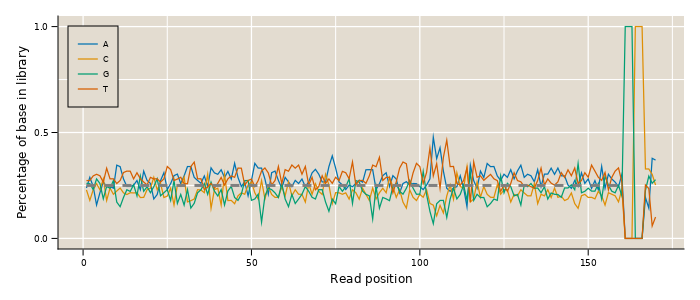

In [5]:
y = PFM(promoter_seqs)
y = y ./ sum(y, dims=1)

fig = Figure(resolution=(700, 300))
ax = Axis(fig[1, 1])
for (i, l) in enumerate(["A", "C", "G", "T"])
    lines!(ax, y[i, :], label=l)
end
lines!(ax, [1, 160], [0.25, 0.25], color="gray", linestyle=:dash, linewidth=3)
ax.xlabel = "Read position"
ax.ylabel = "Percentage of base in library"
axislegend(ax, position=:lt)

fig

In [6]:
df = CSV.read("../../../data/processed_promoters/20220423_mapping/110_R2_promoters.txt", DataFrame, header=["sequence"])
df.sequence = [LongDNA{4}(x[1:160]) for x in df.sequence]

727640-element Vector{LongSequence{DNAAlphabet{4}}}:
 TCACCCTAAGGGCTATCTTCCCAAATCGGGATCTCACTC…CCGTTGTCAGTGTTCCGATGCAAACGTTCTGGTAGTTGG
 CCCTGCATAACAATGTCCTGTGAAAAGAGTTATTGTGAC…TCTGTGGCGTTTACATTGTTTCAATTATTAACTAGTTTT
 AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA…AAAAAAAAAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAA
 TCACCCTACGCGCTATCTCCCCGAACCCGCATCCCACTG…CGGTTCCGATCGTGCCTTAGTCACCGTACAGGTTCTTCC
 AAAATAAAAAACTAAAAAAAAAAAAAAAAAAAAAAAAAA…AAAAAAAAAAAAAGAAAAAAAAAAAAAAAGAGAAAAAAA
 AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA…AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
 AAATAAAAAAAAAACATAAGAAAAAAAAAATAAACAAAA…AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
 AAAAAAAAAAAACAAAAAAAAAAAAATAAAAAAAAAAAA…AAAAAAAAAAAAAGAAAAAAAAAAAAAAAAAAAAAAAAA
 AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA…AAAAAAAAAAAAAGAAAAAAAAAAAAAAAAAAAAAAAAA
 AAAAAAAAAAAAAAAAAAAAAAAAAAAATAATAAAAAAA…AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
 TGACGCTTCTCGCTGTCTTCGGGAAAAAAAAAAAAAAAA…AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
 AAAAAAAAAAACAAAAAAACAAAAACAAAAAAATAAAAA…AAAAAAAAAAAAAGA

In [9]:
df = CSV.read("../../../data/promoters/20220423_mapping/110_S2_R2_001_promoters.txt", DataFrame, header=["sequence"])
df.sequence = [LongDNA{4}(x[1:160]) for x in df.sequence]


name_list = String[]
for i in 1:nrow(df)
    try
        push!(name_list, sequence_dict[df.sequence[i]])
    catch e
        push!(name_list, "None")
    end
end

name_list |> unique

726-element Vector{String}:
 "None"
 "acrBp_66"
 "ldrDp_697"
 "ldrDp_871"
 "acrBp_1496"
 "rdlDp_1255"
 "acrZp_1034"
 "ldrDp_273"
 "ldrDp_1454"
 "dinQp_19"
 "rdlDp_1312"
 "dinQp_1302"
 "acrBp_127"
 ⋮
 "acrBp_329"
 "dinQp_61"
 "dinQp_480"
 "ldrDp_718"
 "acrBp_641"
 "ldrDp_957"
 "acrZp_906"
 "acrBp_1223"
 "dinQp_453"
 "acrBp_1422"
 "ldrDp_1065"
 "rdlDp_589"

In [10]:
df = CSV.read("../../../data/processed_promoters/20220423_mapping/110_R2_promoters.txt", DataFrame, header=["sequence"])
df.sequence = [LongDNA{4}(x[1:160]) for x in df.sequence]


name_list = String[]
for i in 1:nrow(df)
    try
        push!(name_list, sequence_dict[df.sequence[i]])
    catch e
        push!(name_list, "None")
    end
end

name_list |> unique

726-element Vector{String}:
 "None"
 "acrBp_66"
 "ldrDp_697"
 "ldrDp_871"
 "acrBp_1496"
 "rdlDp_1255"
 "acrZp_1034"
 "ldrDp_273"
 "ldrDp_1454"
 "dinQp_19"
 "rdlDp_1312"
 "dinQp_1302"
 "acrBp_127"
 ⋮
 "acrBp_329"
 "dinQp_61"
 "dinQp_480"
 "ldrDp_718"
 "acrBp_641"
 "ldrDp_957"
 "acrZp_906"
 "acrBp_1223"
 "dinQp_453"
 "acrBp_1422"
 "ldrDp_1065"
 "rdlDp_589"

In [12]:
df = CSV.read("../../../data/promoters/20220423_mapping/201_S3_R2_001_promoters.txt", DataFrame, header=["sequence"])
df.sequence = [LongDNA{4}(x[1:160]) for x in df.sequence]


name_list = String[]
for i in 1:nrow(df)
    try
        push!(name_list, sequence_dict[df.sequence[i]])
    catch e
        push!(name_list, "None")
    end
end

name_list |> unique

3122-element Vector{String}:
 "None"
 "ldrDp_1139"
 "tisBp_826"
 "ldrDp_92"
 "acrBp_372"
 "rdlDp_2"
 "ratA_yfjF_predicted_89"
 "TSS_18061_regulondb_1207"
 "tabA_predicted_289"
 "TSS_18061_regulondb_988"
 "tabA_predicted_125"
 "dinQp_779"
 "tolCp2_823"
 ⋮
 "acrZp_1492"
 "TSS_18061_regulondb_138"
 "yagB_insX_yagA_predicted_672"
 "sohAp_745"
 "acrBp_789"
 "acrBp_773"
 "tisBp_1371"
 "tisBp_132"
 "tolCp3_705"
 "rdlDp_157"
 "tolCp2_699"
 "ldrDp_1212"

In [11]:
df = CSV.read("../../../data/processed_promoters/20220423_mapping/201_R2_promoters.txt", DataFrame, header=["sequence"])
df.sequence = [LongDNA{4}(x[1:160]) for x in df.sequence]


name_list = String[]
for i in 1:nrow(df)
    try
        push!(name_list, sequence_dict[df.sequence[i]])
    catch e
        push!(name_list, "None")
    end
end

name_list |> unique

3122-element Vector{String}:
 "None"
 "ldrDp_1139"
 "tisBp_826"
 "ldrDp_92"
 "acrBp_372"
 "rdlDp_2"
 "ratA_yfjF_predicted_89"
 "TSS_18061_regulondb_1207"
 "tabA_predicted_289"
 "TSS_18061_regulondb_988"
 "tabA_predicted_125"
 "dinQp_779"
 "tolCp2_823"
 ⋮
 "acrZp_1492"
 "TSS_18061_regulondb_138"
 "yagB_insX_yagA_predicted_672"
 "sohAp_745"
 "acrBp_789"
 "acrBp_773"
 "tisBp_1371"
 "tisBp_132"
 "tolCp3_705"
 "rdlDp_157"
 "tolCp2_699"
 "ldrDp_1212"

In [13]:
df = CSV.read("../../../data/promoters/20220423_mapping/204_S4_R2_001_promoters.txt", DataFrame, header=["sequence"])
df.sequence = [LongDNA{4}(x[1:160]) for x in df.sequence]


name_list = String[]
for i in 1:nrow(df)
    try
        push!(name_list, sequence_dict[df.sequence[i]])
    catch e
        push!(name_list, "None")
    end
end

name_list |> unique

1178-element Vector{String}:
 "None"
 "mtnp2_5"
 "yadI_predicted_248"
 "yadI_predicted_114"
 "yahL_predicted_1487"
 "yadE_predicted_1318"
 "yadI_predicted_467"
 "TSS_1414_storz_regulondb_536"
 "yadN_predicted_993"
 "yadI_predicted_129"
 "yadE_predicted_410"
 "TSS_1414_storz_regulondb_609"
 "yadG_yadH_predicted_677"
 ⋮
 "TSS_1414_storz_regulondb_105"
 "yadI_predicted_689"
 "yadI_predicted_268"
 "mtnp2_671"
 "yadI_predicted_370"
 "yacCp_791"
 "TSS_1414_storz_regulondb_1024"
 "yadE_predicted_792"
 "TSS_1414_storz_regulondb_675"
 "yadN_predicted_1000"
 "mtnp_323"
 "yadG_yadH_predicted_825"

In [14]:
df = CSV.read("../../../data/processed_promoters/20220423_mapping/204_R2_promoters.txt", DataFrame, header=["sequence"])
df.sequence = [LongDNA{4}(x[1:160]) for x in df.sequence]


name_list = String[]
for i in 1:nrow(df)
    try
        push!(name_list, sequence_dict[df.sequence[i]])
    catch e
        push!(name_list, "None")
    end
end

name_list |> unique

1178-element Vector{String}:
 "None"
 "mtnp2_5"
 "yadI_predicted_248"
 "yadI_predicted_114"
 "yahL_predicted_1487"
 "yadE_predicted_1318"
 "yadI_predicted_467"
 "TSS_1414_storz_regulondb_536"
 "yadN_predicted_993"
 "yadI_predicted_129"
 "yadE_predicted_410"
 "TSS_1414_storz_regulondb_609"
 "yadG_yadH_predicted_677"
 ⋮
 "TSS_1414_storz_regulondb_105"
 "yadI_predicted_689"
 "yadI_predicted_268"
 "mtnp2_671"
 "yadI_predicted_370"
 "yacCp_791"
 "TSS_1414_storz_regulondb_1024"
 "yadE_predicted_792"
 "TSS_1414_storz_regulondb_675"
 "yadN_predicted_1000"
 "mtnp_323"
 "yadG_yadH_predicted_825"

In [15]:
df = CSV.read("../../../data/processed_promoters/20220423_mapping/100_R2_promoters.txt", DataFrame, header=["sequence"])
df.sequence = [LongDNA{4}(x[1:160]) for x in df.sequence]


name_list = String[]
for i in 1:nrow(df)
    try
        push!(name_list, sequence_dict[df.sequence[i]])
    catch e
        push!(name_list, "None")
    end
end

name_list |> unique

11674-element Vector{String}:
 "None"
 "mtnp_418"
 "ygeY_predicted_686"
 "ratA_yfjF_predicted_322"
 "ygfKp_187"
 "tmaR_predicted_800"
 "fldAp_442"
 "fldAp_506"
 "yqjE_yqjK_yqjD_yqjC_predicted_326"
 "mhpRp1_545"
 "yjbJ_predicted_673"
 "fldAp_1069"
 "rcsDp_1312"
 ⋮
 "ybaY_predicted_196"
 "ftsKp2_890"
 "yjbJ_predicted_1169"
 "acrBp_697"
 "kbpp4_1298"
 "rcsBp1_556"
 "yadI_predicted_366"
 "araBp_383"
 "acrAp_1007"
 "tfaE_stfE_predicted_515"
 "ompRp1_828"
 "ihfAp4_713"

In [16]:
df = CSV.read("../../../data/processed_promoters/20220423_mapping/100_R2_promoters.txt", DataFrame, header=["sequence"])
df.sequence = [LongDNA{4}(x[1:160]) for x in df.sequence]


name_list = String[]
for i in 1:nrow(df)
    try
        push!(name_list, sequence_dict[df.sequence[i]])
    catch e
        push!(name_list, "None")
    end
end

name_list |> unique

11674-element Vector{String}:
 "None"
 "mtnp_418"
 "ygeY_predicted_686"
 "ratA_yfjF_predicted_322"
 "ygfKp_187"
 "tmaR_predicted_800"
 "fldAp_442"
 "fldAp_506"
 "yqjE_yqjK_yqjD_yqjC_predicted_326"
 "mhpRp1_545"
 "yjbJ_predicted_673"
 "fldAp_1069"
 "rcsDp_1312"
 ⋮
 "ybaY_predicted_196"
 "ftsKp2_890"
 "yjbJ_predicted_1169"
 "acrBp_697"
 "kbpp4_1298"
 "rcsBp1_556"
 "yadI_predicted_366"
 "araBp_383"
 "acrAp_1007"
 "tfaE_stfE_predicted_515"
 "ompRp1_828"
 "ihfAp4_713"